In [2]:
import pandas as pd

In [3]:
#Faz a leitura dos arquivos excel
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Salvador.xlsx")
df5 = pd.read_excel("Recife.xlsx")

In [4]:
#Juntar todos os arquivo excel em um só
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
#Verificando o tipo de dado de cada coluna
df.dtypes

#Verificando uma amostra de linhas aleatórias
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
200,Natal,2019-01-02,41.06,1035,1
9,Fortaleza,2019-01-01,11.17,1002,6
3,Salvador,2019-02-10,176.34,1037,3
117,Aracaju,2018-01-01,170.97,1521,4
68,Fortaleza,2019-01-01,85.09,1005,6


In [6]:
#Alterando o tipo de dado da coluna Loja
df["LojaID"] = df["LojaID"].astype("object")

In [7]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [8]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

**Substituindo valores nulos**

In [9]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [10]:
#Substituindo os valores nulos por 0
df["Vendas"].fillna(0, inplace = True)

In [11]:
#Apagar linhas com valores nulos, pesquisa em todas as colunas
df.dropna(inplace = True)

In [12]:
#Apagar linhas com valores nulos apenas na coluna específica
df.dropna(subset=["Vendas"], inplace=True)

In [13]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace = True)

**Criando novas colunas**

In [14]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [15]:
df.head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [16]:
#Se não houvesse a coluna Qntd para achar teríamos que dividir Receitas/Vendas
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]

In [17]:
#A coluna nova tem o mesmo valor de Qntd
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [18]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [19]:
#Retornando a menor receita
df["Receita"].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0       142.00
1        85.26
2        71.55
3        21.07
4       196.08
        ...   
137     155.97
138     902.28
139     988.12
140     834.45
141    1462.00
Name: Receita, Length: 894, dtype: float64>

In [20]:
#nlargest passa o podium (3 maiores ou 5 maiores) e a coluna que deseja saber
df.nlargest(3, "Receita") #Poderia ser o top 10 também

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [21]:
#nsmallest é o inverso do nlargest, retorna o podium dos menores
df.nsmallest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0


In [22]:
#Agrupamento por cidade, pega a soma de cada cidade da coluna definida
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [23]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Trabalhando com datas**

In [24]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [25]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [30]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [31]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [32]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [33]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [34]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
94,Natal,2019-01-02,33.24,1037,1,33.24,1.0,2019


In [35]:
#Extraindo mês e dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.0,2019,3,2
55,Fortaleza,2019-01-01,214.73,1002,4,858.92,4.0,2019,1,1
33,Fortaleza,2019-01-01,19.56,1005,1,19.56,1.0,2019,1,1
97,Salvador,2019-01-01,39.91,1037,3,119.73,3.0,2019,1,1


In [37]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [38]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [39]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days


In [40]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
57,Recife,2019-01-01,201.41,980,3,604.23,3.0,2019,1,1,365 days,1
223,Natal,2019-01-02,40.51,1037,2,81.02,2.0,2019,1,2,366 days,1
24,Aracaju,2018-01-01,151.04,1522,6,906.24,6.0,2018,1,1,0 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3,367 days,1


In [42]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["mes_venda"] == 3)]
#No final poderia ser (df["Data"].dt.month == 3)

In [43]:
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019,3,7,430 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.0,2019,3,2,425 days,1


**Visualização de dados**

In [67]:
#Conta os valores de um determinado dado, verifica quantas vezes ele aparece ao longo do conjunto de dados (dataframe)
df["LojaID"].value_counts(ascending=False)
#Loja 1036 realizou 117 vendas

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

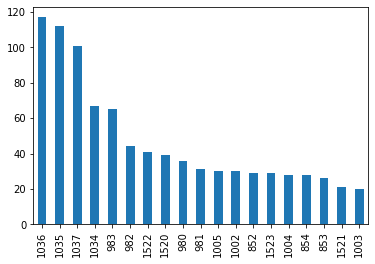

In [46]:
#Gráfico de barras.plot.bar()
df["LojaID"].value_counts(ascending=False).plot.bar()

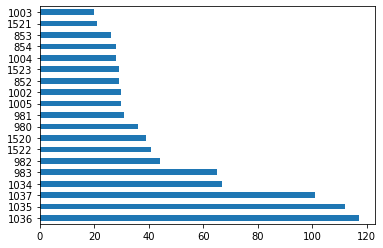

In [47]:
#Gráfico de barras horizontais .plot.barh()
df["LojaID"].value_counts(ascending=False).plot.barh()
#Alterar ascending para TRUE e ele devolve do maior para o menor

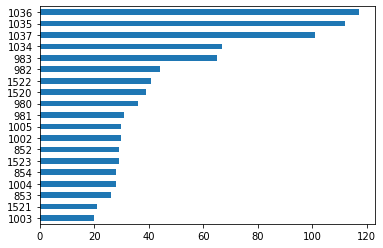

In [48]:
#Gráfico de barras horizontais .plot.barh()
df["LojaID"].value_counts(ascending=True).plot.barh();
#Deve-se adicionar o ponto e vírgula ao final do código para não mostrar descrição

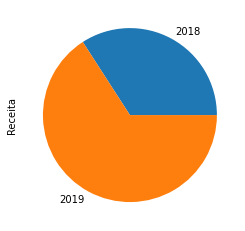

In [49]:
#Gráfico de piza .plot.pie();
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

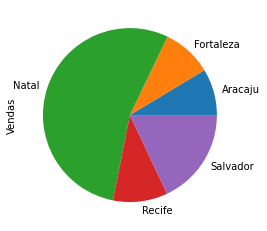

In [51]:
#Total de vendas por cidade
df.groupby(df["Cidade"])["Vendas"].sum().plot.pie();

In [52]:
#Total de vendas por cfidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

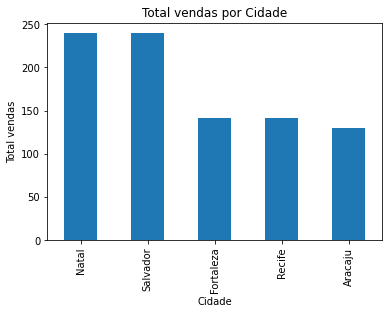

In [53]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

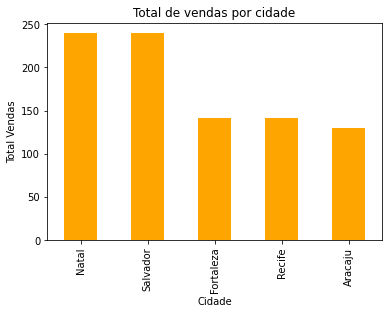

In [54]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade", color = "orange")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [55]:
#Alterando o estilo
plt.style.use("ggplot")

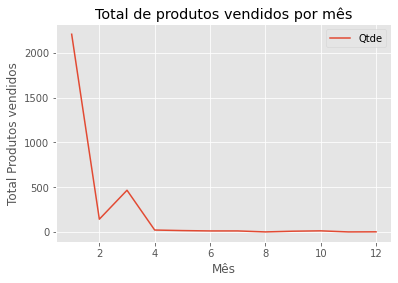

In [57]:
#.plot() é o gráfico de linhas/Está com estilo alterado
#plt.legend() é a legenda do gráfico

df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

In [60]:
#Agrupa mês por quantidade de vendas somados anos 2018 e 2019
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [61]:
#Selecionar apenas o ano de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

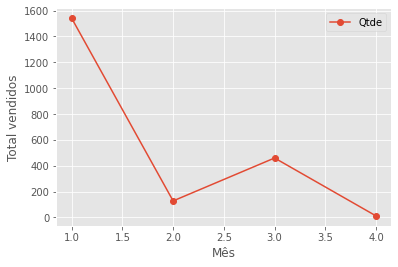

In [62]:
#Total de produtos vendidos por mês
#marker: define o final de cada mês

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total vendidos")
plt.legend();

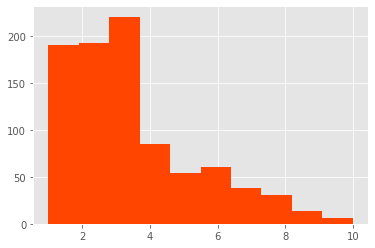

In [63]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

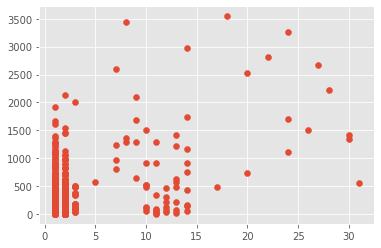

In [64]:
#Scatter plot: Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

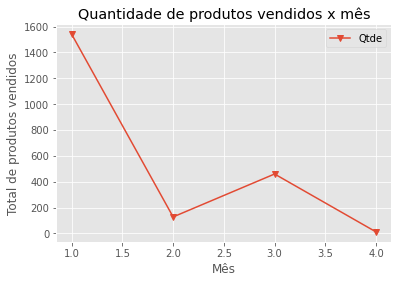

In [65]:
#Salvando em png
#plt.savefig

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png");